In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [10]:
dataa = pd.read_csv('car_sets.csv')
dataa.head()
data = dataa[['Price', 'Brand', 'Mileage', 'EngineV','Registration', 'Year']]
data.head()

,Price,Brand,Mileage,EngineV,Registration,Year
0,4200.0,BMW,277,2.0,yes,1991
1,7900.0,Mercedes-Benz,427,2.9,yes,1999
2,13300.0,Mercedes-Benz,358,5.0,yes,2003
3,23000.0,Audi,240,4.2,yes,2007
4,18300.0,Toyota,120,2.0,yes,2011


#### We have an overview of the data 

In [13]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [19]:
data1 = data.dropna()
data1.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [20]:
data1.head(10)

,Price,Brand,Mileage,EngineV,Registration,Year
0,4200.0,BMW,277,2.0,yes,1991
1,7900.0,Mercedes-Benz,427,2.9,yes,1999
2,13300.0,Mercedes-Benz,358,5.0,yes,2003
3,23000.0,Audi,240,4.2,yes,2007
4,18300.0,Toyota,120,2.0,yes,2011
5,199999.0,Mercedes-Benz,0,5.5,yes,2016
6,6100.0,BMW,438,2.0,yes,1997
7,14200.0,Audi,200,2.7,yes,2006
8,10799.0,Renault,193,1.5,yes,2012
9,1400.0,Volkswagen,212,1.8,no,1999


#### We preprocess our data 
we begin by handling our numerical values, eliminating outliers 

In [25]:
data1['Mileage'].describe()

count    4025.000000
mean      163.572174
std       103.394703
min         0.000000
25%        90.000000
50%       158.000000
75%       230.000000
max       980.000000
Name: Mileage, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mileage', ylabel='Count'>

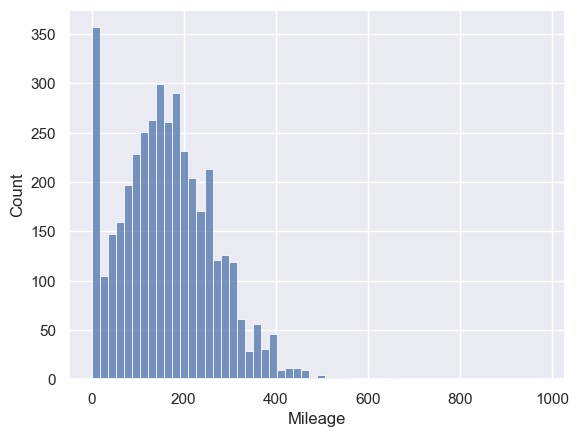

In [30]:
import seaborn as sns
sns.set()
sns.histplot(data1['Mileage'])
# plt.show()

In [84]:
#we eliminate the outliers using the quantile measure or the percentile measure to eliminate the outliers
q = data1['Mileage'].quantile(0.95)
data2 = data1[data1['Mileage'] < q]
data2.describe()
# percent = data1['Mileage'].max() * 0.95
# percent
# datta = data1[data1['Mileage'] < percent]
# datta.head()

,Price,Mileage,EngineV,Year
count,3823.000000,3823.000000,3823.000000,3823.000000
mean,20261.348930,150.722469,2.756448,2006.899294
std,26261.551134,87.331958,4.810989,6.329605
min,600.000000,0.000000,0.600000,1969.000000
25%,7400.000000,87.000000,1.800000,2003.000000
50%,11990.000000,150.000000,2.200000,2008.000000
75%,22700.000000,217.000000,3.000000,2012.000000
max,300000.000000,340.000000,99.990000,2016.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


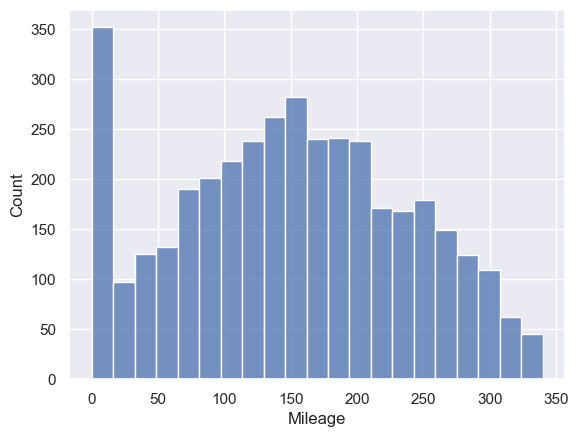

In [85]:
#we replot the graph to see how well the outliers have been handled
sns.histplot(data2['Mileage'])
plt.show()

#### We proceed to analyze the EngineV

In [86]:
data2['EngineV'].describe()

count    3823.000000
mean        2.756448
std         4.810989
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


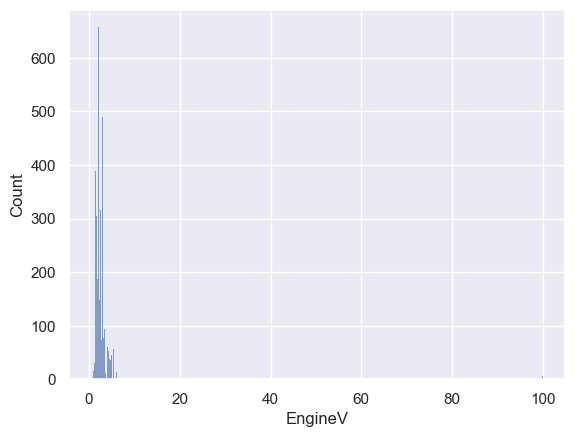

In [87]:
sns.histplot(data2['EngineV'])
plt.show()

#### This has so many outliers. so we proceed to eliminate them as we did to Mileage

In [70]:
percent2 = data2['EngineV'].max() * 0.10
data3 = data2[data2['EngineV'] < percent2]
data3.describe()

,Price,Mileage,EngineV,Year
count,3804.000000,3804.000000,3804.000000,3804.000000
mean,20325.765237,150.478181,2.472387,2006.917192
std,26308.542953,87.314136,0.995917,6.328232
min,600.000000,0.000000,0.600000,1969.000000
25%,7499.750000,86.000000,1.800000,2003.000000
50%,11999.000000,150.000000,2.200000,2008.000000
75%,22800.000000,216.000000,3.000000,2012.000000
max,300000.000000,340.000000,9.000000,2016.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


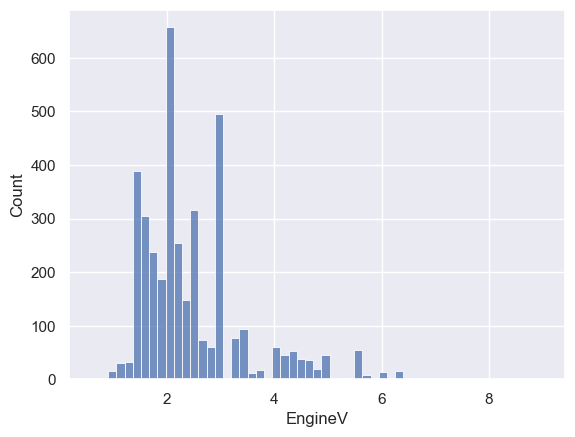

In [93]:
sns.histplot(data3['EngineV'])
plt.show()

In [72]:
data3

,Price,Brand,Mileage,EngineV,Registration,Year
0,4200.0,BMW,277,2.0,yes,1991
3,23000.0,Audi,240,4.2,yes,2007
4,18300.0,Toyota,120,2.0,yes,2011
5,199999.0,Mercedes-Benz,0,5.5,yes,2016
7,14200.0,Audi,200,2.7,yes,2006
...,...,...,...,...,...,...
4339,17900.0,Toyota,35,1.6,yes,2014
4340,125000.0,Mercedes-Benz,9,3.0,yes,2014
4341,6500.0,BMW,1,3.5,yes,1999
4342,8000.0,BMW,194,2.0,yes,1985


#### Then we proceed to satisfy the OLS assumptions
we start with linearity

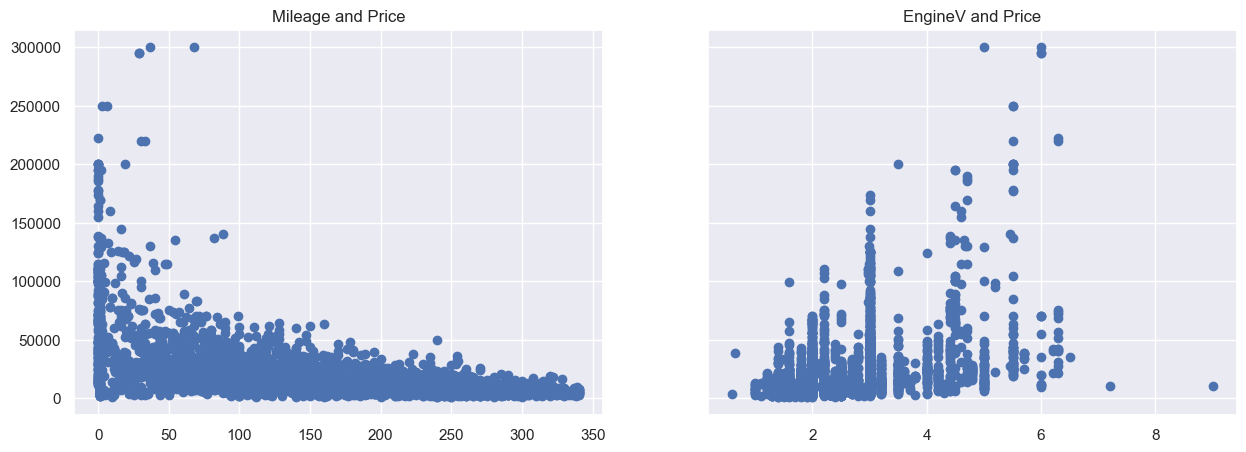

In [91]:
import matplotlib.pyplot as plt

y = data3['Price']
test = data3['Mileage']
test2 = data3['EngineV']


f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(15,5))


ax1.scatter(test,y)
ax1.set_title('Mileage and Price') 


ax2.scatter(test2,y)
ax2.set_title('EngineV and Price')
plt.show()

### SInce the independent varibles did not satisfy linearity, we convert the dependent varible to its logarithm form, thereby handling linearity

In [98]:
log = np.log(data3['Price'])
data3['Log_Price'] = log
data3

,Price,Brand,Mileage,EngineV,Registration,Year,Log_Price
0,4200.0,BMW,277,2.0,yes,1991,8.342840
3,23000.0,Audi,240,4.2,yes,2007,10.043249
4,18300.0,Toyota,120,2.0,yes,2011,9.814656
5,199999.0,Mercedes-Benz,0,5.5,yes,2016,12.206068
7,14200.0,Audi,200,2.7,yes,2006,9.560997
...,...,...,...,...,...,...,...
4339,17900.0,Toyota,35,1.6,yes,2014,9.792556
4340,125000.0,Mercedes-Benz,9,3.0,yes,2014,11.736069
4341,6500.0,BMW,1,3.5,yes,1999,8.779557
4342,8000.0,BMW,194,2.0,yes,1985,8.987197


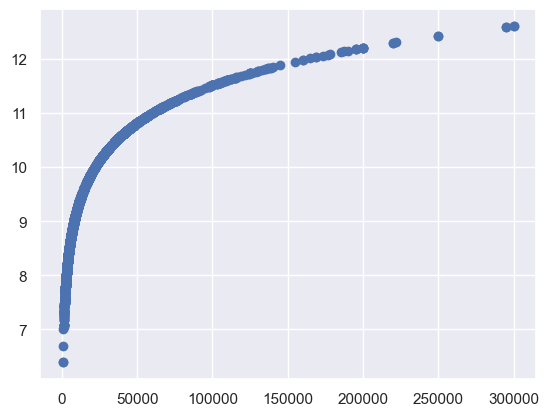

In [102]:
plt.scatter(data3['Price'],data3['Log_Price'])
plt.show()

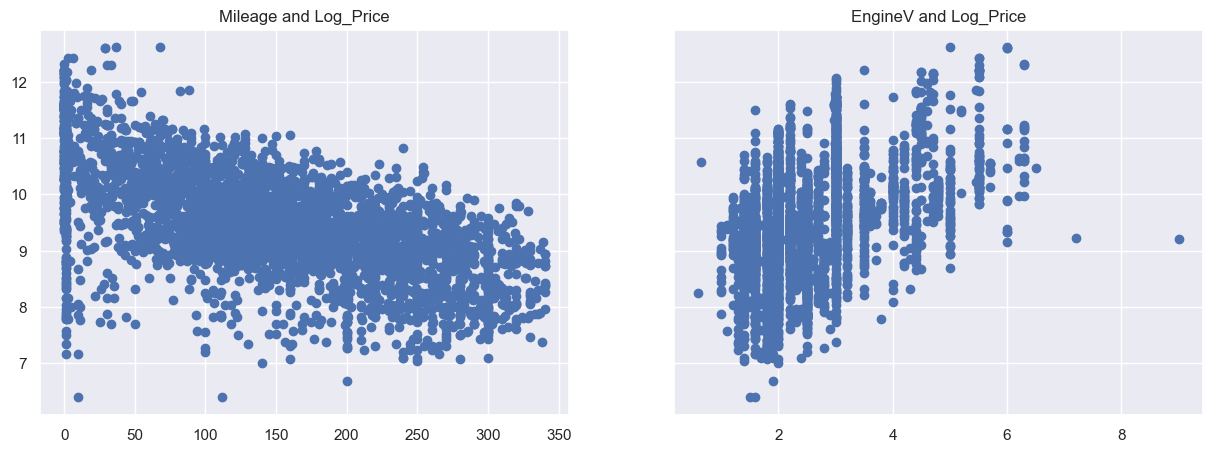

In [104]:
import matplotlib.pyplot as plt

y1 = data3['Log_Price']
test1 = data3['Mileage']
test3 = data3['EngineV']


f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(15,5))


ax1.scatter(test1,y1)
ax1.set_title('Mileage and Log_Price') 


ax2.scatter(test3,y1)
ax2.set_title('EngineV and Log_Price')
plt.show()

###### Now linearity has been satisfied
## We then proceed to handle our categorical data

In [127]:
data4 = data3.drop(['Price'],axis = 1)
data4

,Brand,Mileage,EngineV,Registration,Year,Log_Price
0,BMW,277,2.0,yes,1991,8.342840
3,Audi,240,4.2,yes,2007,10.043249
4,Toyota,120,2.0,yes,2011,9.814656
5,Mercedes-Benz,0,5.5,yes,2016,12.206068
7,Audi,200,2.7,yes,2006,9.560997
...,...,...,...,...,...,...
4339,Toyota,35,1.6,yes,2014,9.792556
4340,Mercedes-Benz,9,3.0,yes,2014,11.736069
4341,BMW,1,3.5,yes,1999,8.779557
4342,BMW,194,2.0,yes,1985,8.987197


In [150]:
dummies = pd.get_dummies(data4[['Brand','Registration']],drop_first = True, dtype = 'int' )
data5=data4.join(dummies)
data5.head(20)
data6 = data5.drop(columns=['Brand','Registration'],inplace=True)
data5

,Mileage,EngineV,Year,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,1
5,0,5.5,2016,12.206068,0,1,0,0,0,0,1
7,200,2.7,2006,9.560997,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4339,35,1.6,2014,9.792556,0,0,0,0,1,0,1
4340,9,3.0,2014,11.736069,0,1,0,0,0,0,1
4341,1,3.5,1999,8.779557,1,0,0,0,0,0,1
4342,194,2.0,1985,8.987197,1,0,0,0,0,0,1


In [151]:
data5.head()

,Mileage,EngineV,Year,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,1
5,0,5.5,2016,12.206068,0,1,0,0,0,0,1
7,200,2.7,2006,9.560997,0,0,0,0,0,0,1


In [153]:
data_cleaned = data5.reset_index(drop=True)

#### Standardization of values

In [144]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit()